# Run Time function

In [1]:
import time
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time.time()*10**12
        result = func(*args, **kwargs)
        t2 = time.time()*10**12
        return result , t2-t1
    return wrap_func

# Rabin Karp Algorithm (RK)

El algoritmo RK es un algoritmo de comparacion que consiste en recorrer el texto comparando el valor hash de una subcadena de texto especifica con el valor del hash de la cadena que se esta buscando (patron).

Digamos que se tiene el siguiente texto:
        $$ A\ B\  C\  D\  E\  E\  F\  G\  H\  I $$
y se quiere buscar $$E\  F$$
El algoritmo consiste en crear un window del mismo tamaño de la cadena que se quiere buscar, en este caso seria un window de 2.\
Se calcula el valor hash de el patron y de lo que se encuentre en la window, se compara el valor y en caso de que este sea diferente mueve a la window a la siguiente subcadena.\
Si se encuentra una situacion donde el valor hash de la subcadena en la window es igual al valor hash del patron, se compara caracter por caracter la subcadena con el patron hasta verificar que sea la  misma palabra.
$$ $$
Se puede dar el caso en que el valor hash del contenido de la window sea igual al valor hash del patron, pero las palabras no coinciden. Este tipo de situaciones incrementan la complejidad del algoritmo
Para reducir la ocurrencia de esto, se usa el modulo de un numero primo

In [2]:
d = 256
@timer_func 
def RKAlgorithm(txt, palabra):
    #array = []
    M = len(palabra)
    N = len(txt)
    q = 101
    hashPattern = 0
    hashText = 0
    h = 1
    for i in range(M-1):
        h = (h*d) % q

    for i in range(M):#hash de palabra y primera window
        hashPattern = (d*hashPattern + ord(palabra[i])) % q
        hashText = (d*hashText + ord(txt[i])) % q
 
    for i in range(N-M+1): #recorrer el texto
        if hashPattern == hashText:#si tienen el mismo hash
            for j in range(M):#comparacion caracter por caracter del substring en la window con la palabra
                if txt[i+j] != palabra[j]:
                    break
                else:
                    j += 1
            #if j == M:
             #   array.append(i)
 
        if i < N-M:#hash de la siguiente ventana
            hashText = (d*(hashText-ord(txt[i])*h) + ord(txt[i+M])) % q
    #print(array)

Probar el algoritmo

In [3]:
with open('huge_txt_example.txt','r') as file:
    data = file.read()
#data to lowercase
data = data.lower()

In [8]:
palabra = "aliquam"
search = RKAlgorithm(data,palabra)

# RunTime

In [4]:
wordSearchList = ['dui','aliquam','habitant','neque','nunc','commodo','libero','nulla','sapien','suscipit','viverra','mauris','nibh','nisi','nisl','nunc','odio','orci','ornare','pellentesque','pharetra','placerat','porta','porttitor','posuere','potenti','praesent','pretium','proin','pulvinar','purus','quam','quis','quisque','rhoncus','risus','rutrum','sagittis','sapien','scelerisque','sed','sem','semper','senectus','sit','sociis','sociosqu','sodales','sollicitudin','suscipit','suspendisse','taciti','tellus','tempor','tempus','tincidunt','torquent','tortor','tristique','turpis','ullamcorper','ultrices','ultricies','urna','ut','varius','vehicula','vel','velit','venenatis','vestibulum','vitae','vivamus','viverra','volutpat','vulputate']

In [5]:
runtime = []
for i in wordSearchList:
    search = RKAlgorithm(data,i)
    runtime.append(search[1])


In [ ]:
print(runtime)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(zip(runtime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Rabin-Karp']
df

,T(n) Rabin-Karp
0,5.632969e+11
1,5.516621e+11
2,5.493849e+11
3,5.514597e+11
4,5.722069e+11
...,...
71,5.632762e+11
72,5.578810e+11
73,5.633687e+11
74,5.607389e+11


<AxesSubplot:>

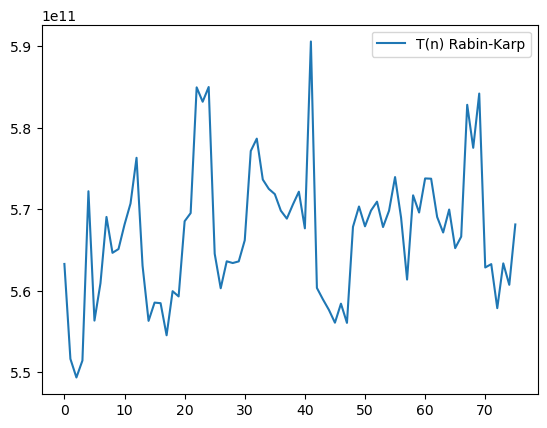

In [7]:
df.plot(y='T(n) Rabin-Karp')

El peor caso O(nm) se da cuando el valor hash de cada substring en la window es igual al hash de la palabra que se esta buscando $$ txt= AAAAAAAAA$$ $$ palabra = AA $$
El mejor caso, y el mas comun, es O(n+m), pues al encontrar dos hash iguales debe comparar la subsitring de la window con la de la palabra.